# SCHEDULE

In this notebook, the preprocessed VACC corpus is annotated for the SCHEDULE alternation, i.e., all alternating instances of that alternation set are tagged in the data. Subsequently, a dataset is prepared for descriptive analysis, i.e., relevant variables (e.g., which variant was used in the previous slot?) from the tagged choice contexts are extracted or calculated. Further, the annotated instances are cross-tabulated and plots including a Sankey diagram are generated.

As mentioned, the actual data used in the doctoral thesis needs to be requested from Ingo Siegert and subsequently preprocessed using the "VACC" notebook in the corresponding folder.

However, the dummy dataset provided for the "VACC" notebook generates a dataset that can also be used to execute this very notebook. Note though that there are only very few instances of SCHEDULE in the dummy dataset (have a look at the DEZEMBER alternation instead).

Refer to the relevant chapter in the doctoral thesis for further explanation of the steps below. 

In [2]:
#importing relevant modules
import pandas as pd, sys, os, shutil, warnings, matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

#informing Python about a custom code directory and importing some of the modules from there
sys.path.append("../../Code/")
import annotation, quantification, persistence

In [ ]:
#defining name of the alternation set and establishing its variants
alternating = "SCHEDULE"
alternation_set = ["erstellen", "eintragen", "tragen", "speichern", "hinzufügen", "fügen", "markieren", "planen", "vereinbaren"] 

## Annotation

Annotation is typically done in multiple sessions. Hence, after each instance that you have annotated you may decide to end the session in which case everything tagged so far is saved. When starting the next session, you will only be assigned the remaining instances, i.e., those cases that have not been annotated thus far.

### Preparations

The first step presupposes that the "VACC" notebook was executed, either using the actual data or the dummy dataset.

In [ ]:
#copying the preprocessed corpus file into the folder "Quantitative_analysis/Annotated_datasets"
#a separate copy for annotation is deemed safer than modifying the persistence-tagged corpus 
source_file = "../../VACC/3_Persistence_tagged/Persistence_VACC_all.csv"
destination_directory = "../Annotated_datasets/"

destination_file = os.path.join(destination_directory, "VACC.csv")

if not os.path.exists(destination_file):
    shutil.copy2(source_file, destination_file)
    print("File moved.")
else:
    print("File already exists.")

In [ ]:
#reading in the (copied) corpus file
df = pd.read_csv("../Annotated_datasets/VACC.csv", sep=",", index_col=0)

#lower-casing the lemma column, as the code below only checks for lower-case variants
df.lemma = df.lemma.str.lower()

#creating a column for saving annotation decisions, if it does not already exist
if not alternating in df.columns:
    df[alternating] = pd.NA

#informing about how many alternating instances have already been tagged
print(f"Cases annotated as alternating: {len(df[df[alternating]=='yes'])}")

### Annotation tool

In short, the tool below 
- informs you about the annotation scheme
- tells you how many untagged instances you have got left
- provides you with the next case to annotate, i.e., a potentially alternating lemma including its immediate context
- displays an input field for deciding the current case according to the scheme
- prompts you to confirm your decision and/or gives you the option to end the current session
- searches for identical contexts prompting you whether the decision should be applied there as well

Decisions are saved in `df_updated`. After each session, this DataFrame still needs to be saved externally. To start a new session, start by reading in the current version of "../Annotated_datasets/VACC.csv" under "Preparations" above.

In [ ]:
#annotating
df_updated = annotation.alternation_check(df, alternation_set, alternating)

In [ ]:
#saving the updated DataFrame externally, overwriting the empty or part-annotated file
df_updated.to_csv("../Annotated_datasets/VACC.csv")

In [ ]:
#once all potentially alternating cases have been annotated, all other tokens of the DataFrame are additionally tagged as non-alternating
if df_updated.loc[df_updated.lemma.isin(alternation_set), alternating].notna().all():
    df_updated[alternating].fillna(value="no", inplace=True)
    df_updated.to_csv("../Annotated_datasets/VACC.csv")
    print("Annotation is completed.")
else:
    print("Annotation is not yet completed, rerun the tool above.")

### Overview

See how many times each speaker used one of the alternating variants.

In [ ]:
#reading in the annotated corpus, filtering, grouping and counting values
df = pd.read_csv("../Annotated_datasets/VACC.csv", sep=",", index_col=0, na_filter=False)
df[df[alternating] == "yes"].groupby("speaker").lemma.value_counts()

## Preparing DataFrame for modelling

In [ ]:
#reading in the annotated corpus now including a column indicating where there was an opportunity ("yes") to choose a variant from the alternation set or not ("no")
df = pd.read_csv("../Annotated_datasets/VACC.csv", index_col=0, na_filter=False, sep=",")

Below, the function `prepare_data_for_modeling` extracts or calculates all relevant variables for each choice context and saves the resulting DataFrame externally. The code for saving is commented out though as it would replace the file that was used for modelling in the thesis. As mentioned, said file is shared given its abstract nature.

In [ ]:
#creating variation_sample, i.e., only annotated choice contexts along with relevant variables
variation_sample = quantification.prepare_data_for_modeling(df, alternating, restrict="yes")

#normalising split verbs to their correct infinitive form
normalising_dict = {"tragen": "eintragen", "fügen": "hinzufügen"}
variation_sample.replace(normalising_dict, inplace=True)

#update alternation_set
alternation_set = ["erstellen", "eintragen", "speichern", "hinzufügen", "markieren", "planen", "vereinbaren"] 

#saving externally (not done, as it would overwrite the actual data used in the thesis which is shared in this repository due to its abstract nature)
#variation_sample.to_csv(f"{alternating}_for_modelling.csv")
variation_sample

## Descriptive Statistics

### Cross-Tabulation

Creating a table showing how often each variant in PREVIOUS was followed by the same or the other variant in CURRENT, using the actual data used in the thesis.

In [5]:
#reading the actual data used in the thesis 
#if you want to run the following code with any data you annotated and prepared yourself, uncomment the external saving above
variation_sample = pd.read_csv("SCHEDULE_for_modelling.csv")

contingency_table = pd.crosstab(variation_sample.PREVIOUS, variation_sample.CURRENT)
contingency_table["Total in PREVIOUS"] = contingency_table.sum(axis=1)
contingency_table.loc["Total in CURRENT"] = contingency_table.sum(axis=0)
contingency_table

CURRENT,eintragen,erstellen,hinzufügen,machen,markieren,planen,speichern,vereinbaren,Total in PREVIOUS
PREVIOUS,,,,,,,,,
eintragen,7,1,1,0,1,0,1,1,12
erstellen,1,5,0,0,0,0,0,0,6
hinzufügen,8,6,2,1,3,0,5,2,27
machen,0,0,0,0,0,0,1,0,1
markieren,0,0,0,0,4,0,0,0,4
planen,2,3,1,0,3,2,2,1,14
speichern,0,0,0,0,0,0,2,0,2
vereinbaren,1,0,0,0,0,0,0,0,1
Total in CURRENT,19,15,4,1,11,2,11,4,67


### Sankey Diagram

Creating a Sankey Diagram showing pairwise variant flow, using the actual data used in the thesis.

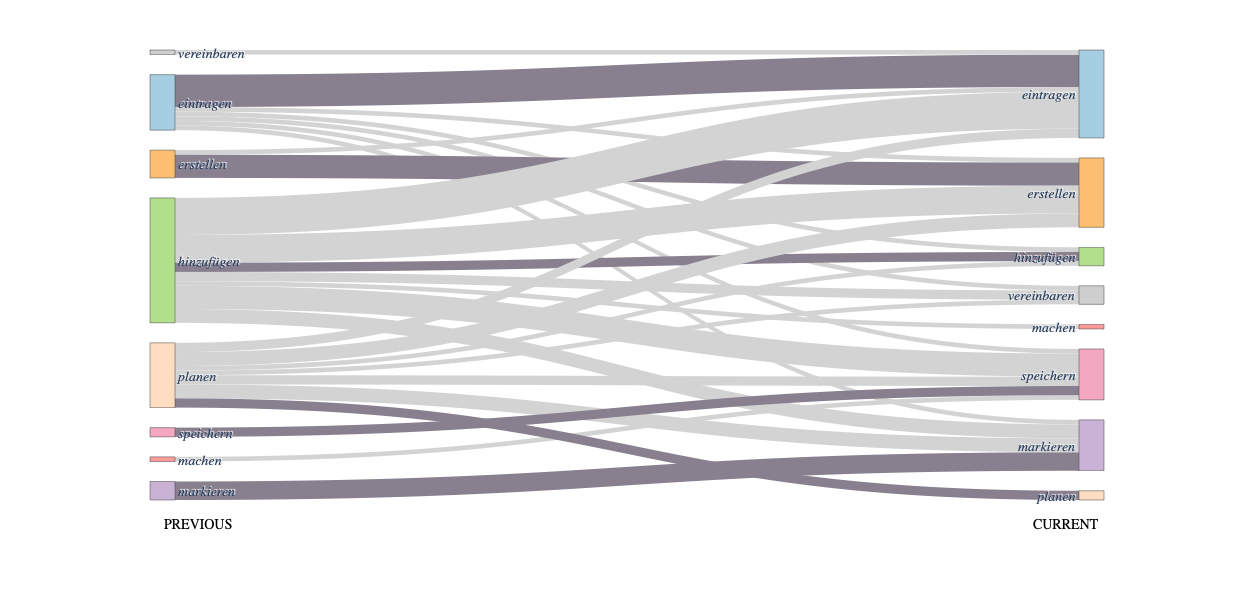

In [6]:
quantification.create_sankey_diagram(variation_sample)

### Distribution of Variants in PREVIOUS per Speaker

Creating a plot showing the distribution of variants in PREVIOUS per speaker. 

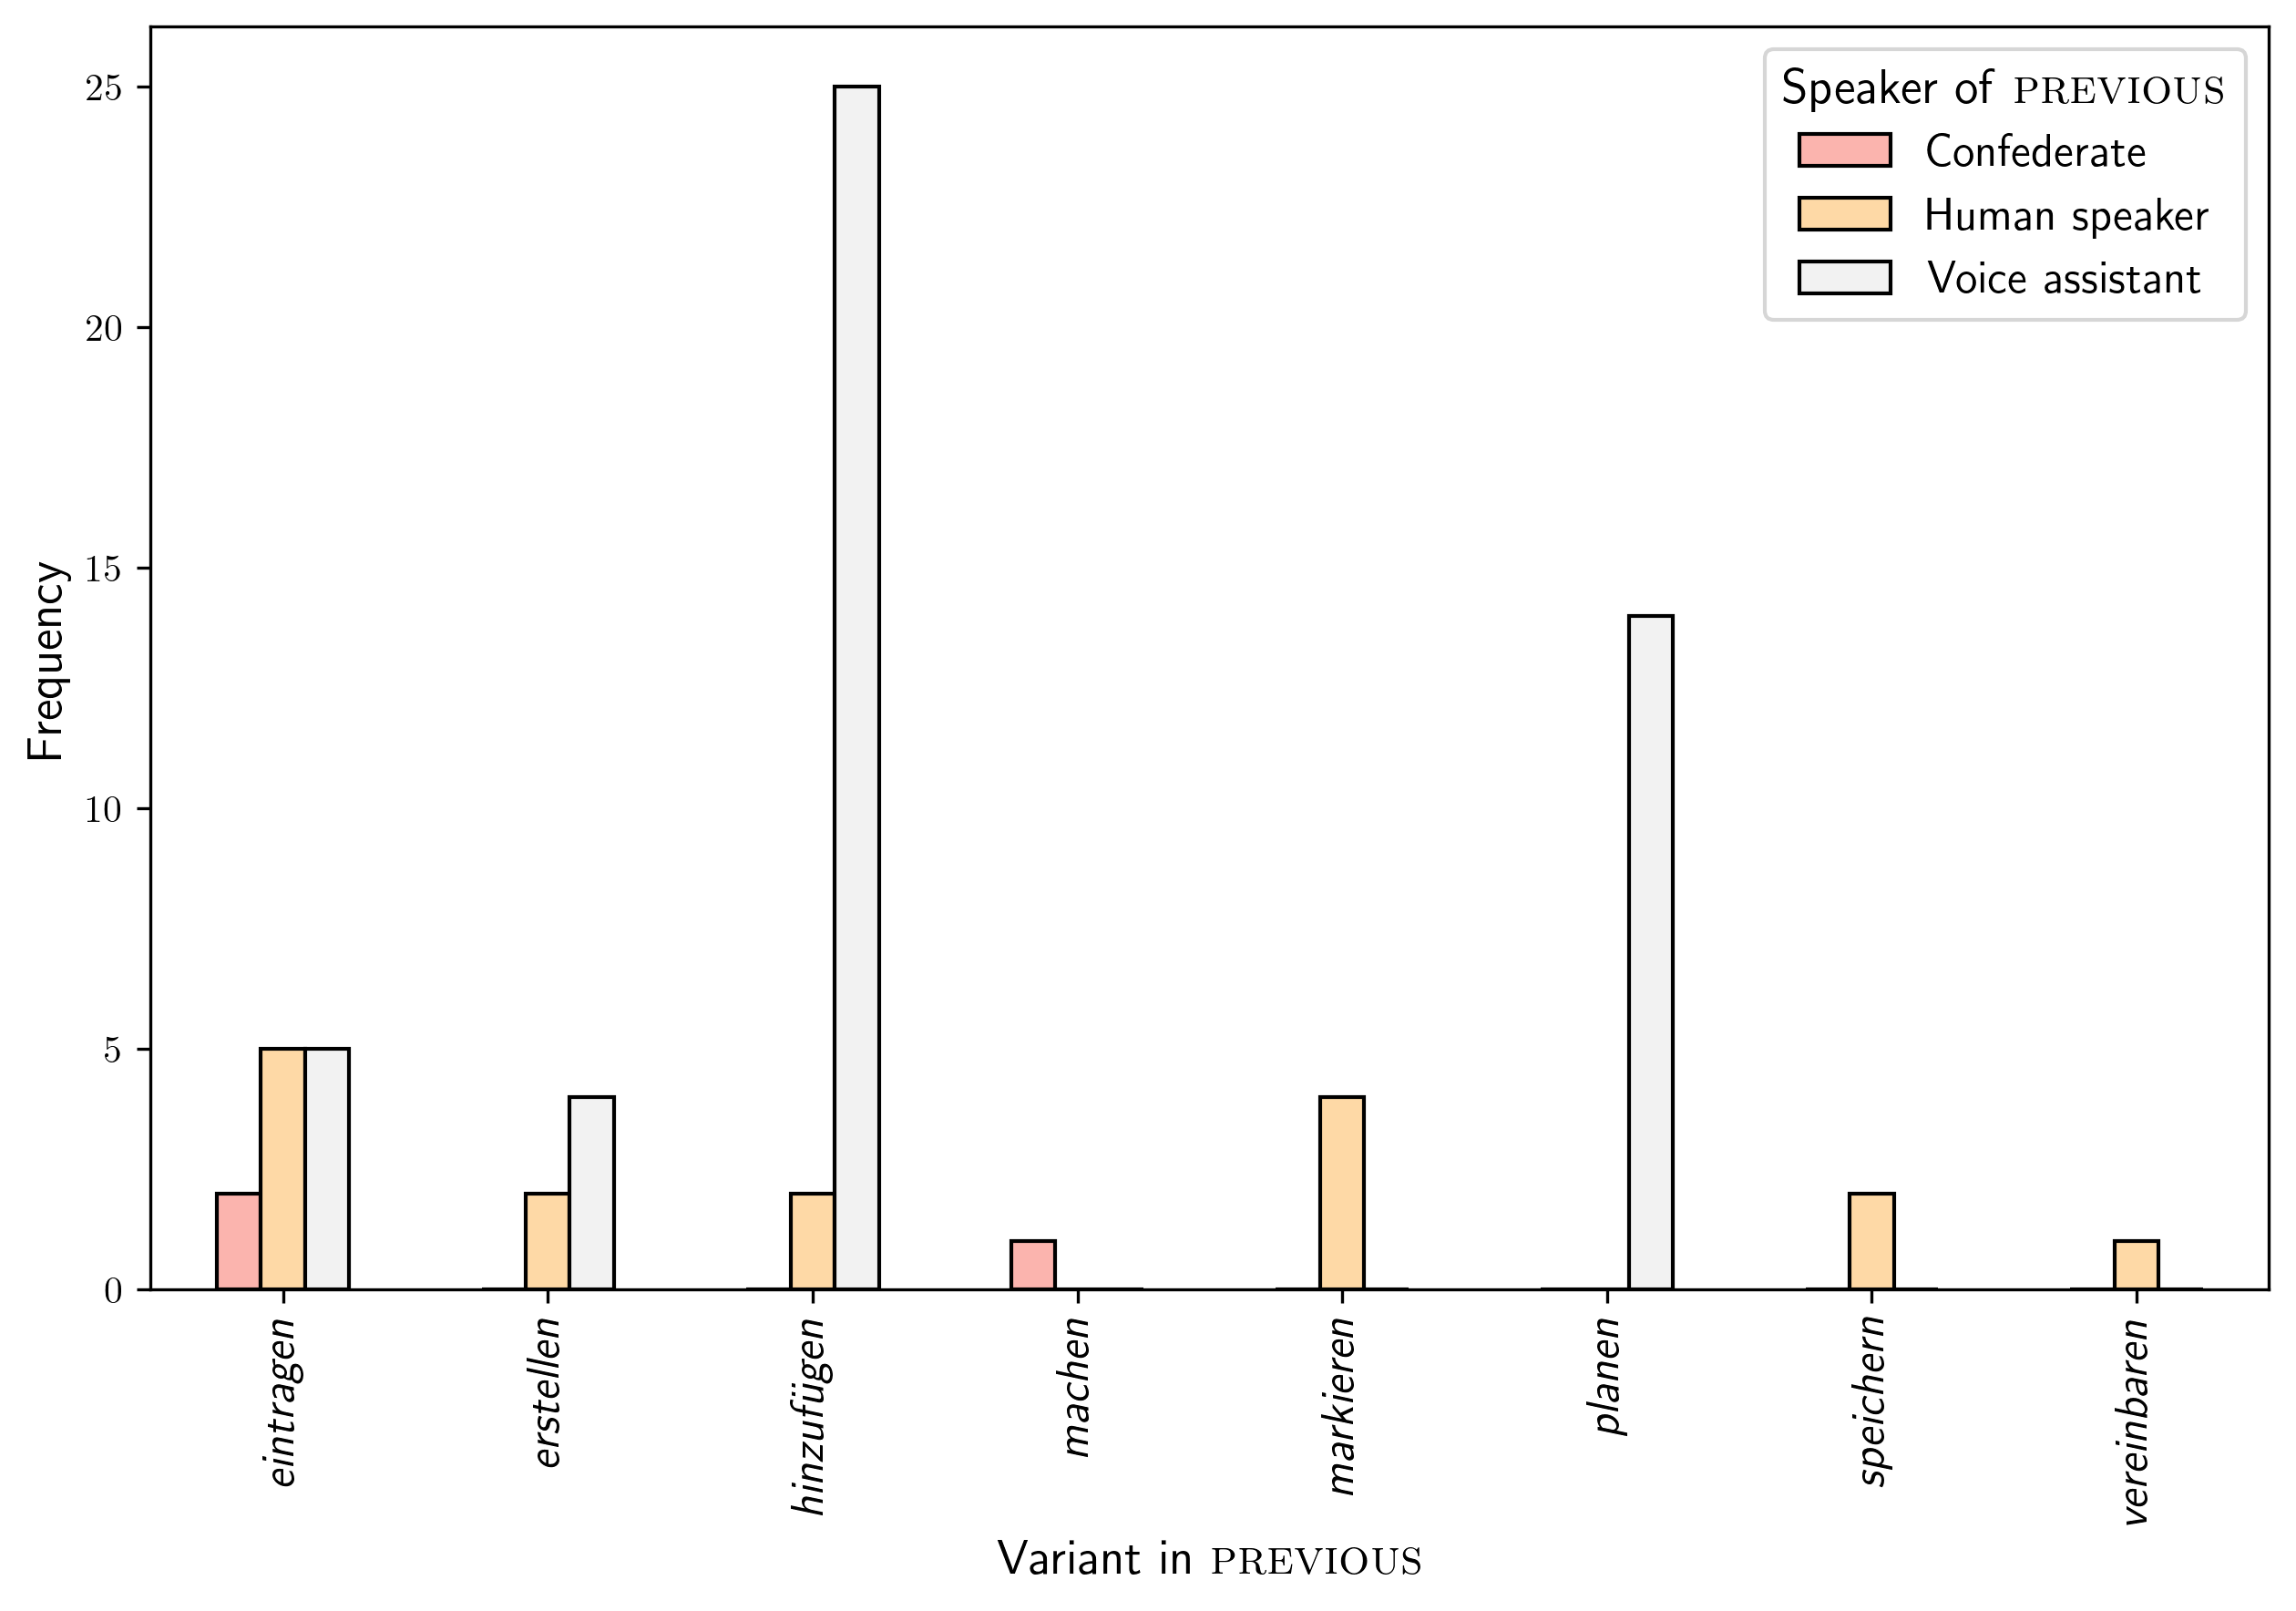

In [8]:
#defining plot and activating LaTex rendering
fig, ax = plt.subplots(figsize=(10, 6), dpi=300) 
plt.rcParams['text.usetex'] = True

#editing speaker labels
variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("A", "Voice assistant")
variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("S", "Human speaker")
variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("J", "Confederate")

#grouping by the previous speaker and counting values
grouped = variation_sample.groupby("PREVIOUS_SPEAKER").PREVIOUS.value_counts()
grouped = grouped.unstack().fillna(0).T

#plotting values
grouped.plot(kind="bar", ax=ax, colormap="Pastel1", edgecolor="black")

#fine-tuning the plot
ax.set_xticklabels([r'\textit{' + label.get_text() + '}' for label in ax.get_xticklabels()])
plt.ylabel(r"Frequency", fontsize=13)
plt.xlabel(r"Variant in \textsc{previous}", fontsize=13)
plt.legend(title=r"Speaker of \textsc{previous}", fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)

plt.show()